In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
email = pd.read_csv(r"D:\Data Scientist\Company Assignments\Skill Genie AIML Intern\Task1\emails.csv")

In [4]:
email.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
X = email.drop('Prediction',axis = 1)

In [7]:
y = email['Prediction']

In [8]:
X

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,0,1,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,0,1,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [10]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [11]:
# Get all column headers and flatten the list
all_headers = [col for col in X.columns]
all_headers

['Email No.',
 'the',
 'to',
 'ect',
 'and',
 'for',
 'of',
 'a',
 'you',
 'hou',
 'in',
 'on',
 'is',
 'this',
 'enron',
 'i',
 'be',
 'that',
 'will',
 'have',
 'with',
 'your',
 'at',
 'we',
 's',
 'are',
 'it',
 'by',
 'com',
 'as',
 'from',
 'gas',
 'or',
 'not',
 'me',
 'deal',
 'if',
 'meter',
 'hpl',
 'please',
 're',
 'e',
 'any',
 'our',
 'corp',
 'can',
 'd',
 'all',
 'has',
 'was',
 'know',
 'need',
 'an',
 'forwarded',
 'new',
 't',
 'may',
 'up',
 'j',
 'mmbtu',
 'should',
 'do',
 'am',
 'get',
 'out',
 'see',
 'no',
 'there',
 'price',
 'daren',
 'but',
 'been',
 'company',
 'l',
 'these',
 'let',
 'so',
 'would',
 'm',
 'into',
 'xls',
 'farmer',
 'attached',
 'us',
 'information',
 'they',
 'message',
 'day',
 'time',
 'my',
 'one',
 'what',
 'only',
 'http',
 'th',
 'volume',
 'mail',
 'contract',
 'which',
 'month',
 'more',
 'robert',
 'sitara',
 'about',
 'texas',
 'nom',
 'energy',
 'pec',
 'questions',
 'www',
 'deals',
 'volumes',
 'pm',
 'ena',
 'now',
 'their'

In [12]:
# Remove stopwords from column headers
remaining_headers = [header for header in all_headers if header.lower() not in ENGLISH_STOP_WORDS]

In [13]:
# Filter DataFrame to keep selected columns
df = X[remaining_headers]

In [14]:
df

,Email No.,ect,hou,enron,s,com,gas,deal,meter,hpl,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,Email 1,1,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,24,27,1,95,3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Email 3,1,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,22,10,0,36,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,17,9,0,19,0,2,0,3,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,0,0,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,11,3,1,101,3,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5169,Email 5170,1,0,0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5170,Email 5171,1,0,0,37,4,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
df.describe()

,ect,hou,enron,s,com,gas,deal,meter,hpl,e,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,5.143852,2.024362,1.335267,41.811872,1.767208,0.617363,0.734532,0.538090,0.635151,84.795244,...,0.005607,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961
std,14.101142,6.967878,4.570525,66.530032,11.002626,1.844452,1.930954,1.945471,1.516908,126.845509,...,0.192108,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,1.000000,46.000000,1.000000,0.000000,0.000000,0.000000,0.000000,97.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,344.000000,167.000000,146.000000,882.000000,726.000000,29.000000,25.000000,29.000000,23.000000,2327.000000,...,10.000000,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000


In [16]:
df.isna().sum()

Email No.         0
ect               0
hou               0
enron             0
s                 0
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Length: 2763, dtype: int64

In [17]:
df.drop("Email No.",axis = 1,inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9960\2183904340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Email No.",axis = 1,inplace = True)


In [18]:
df

,ect,hou,enron,s,com,gas,deal,meter,hpl,e,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,1,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,95,3,1,0,0,0,141,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,2,0,2,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,36,0,0,2,1,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,19,0,2,0,3,0,71,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,0,0,18,0,0,0,0,0,29,...,0,0,0,0,0,0,0,0,0,0
5168,11,3,1,101,3,5,0,0,0,218,...,0,0,0,0,0,0,0,0,1,0
5169,1,0,0,11,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
5170,1,0,0,37,4,0,1,0,0,45,...,0,0,0,0,0,0,0,0,1,0


In [19]:
col = list(df.columns)
print(col)

['ect', 'hou', 'enron', 's', 'com', 'gas', 'deal', 'meter', 'hpl', 'e', 'corp', 'd', 'know', 'need', 'forwarded', 'new', 't', 'j', 'mmbtu', 'price', 'daren', 'company', 'l', 'let', 'm', 'xls', 'farmer', 'attached', 'information', 'message', 'day', 'time', 'http', 'th', 'volume', 'mail', 'contract', 'month', 'robert', 'sitara', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'file', 'email', 'just', 'change', 'like', 'b', 'flow', 'net', 'following', 'p', 'production', 'want', 'original', 'o', 'ticket', 'c', 'make', 'report', 'march', 'contact', 'days', 'list', 'nomination', 'april', 'number', 'sale', 'don', 'thanks', 'business', 'help', 'july', 'forward', 'font', 'free', 'daily', 'use', 'order', 'today', 'r', 'fw', 'set', 'plant', 'statements', 'gary', 'oil', 'line', 'sales', 'w', 'effective', 'tenaska', 'june', 'x', 'nbsp', 'north', 'america', 'week', 'january', 'service', 'purchase', 'height', 'agreement', 'k', 'work', 'tap', 'group', 'year', 'bas

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X = scaler.fit_transform(df)

In [23]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06705539, 0.16167665, 0.00684932, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.01166181, 0.01197605, 0.00684932, ..., 0.        , 0.        ,
        0.        ]])

In [24]:
x = pd.DataFrame(X,columns = col)

In [25]:
x

,ect,hou,enron,s,com,gas,deal,meter,hpl,e,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0.000000,0.000000,0.000000,0.003401,0.000000,0.000000,0.00,0.000000,0.0,0.001290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.067055,0.161677,0.006849,0.107710,0.004132,0.034483,0.00,0.000000,0.0,0.060189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0
2,0.000000,0.000000,0.000000,0.002268,0.000000,0.068966,0.00,0.000000,0.0,0.000860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.061224,0.059880,0.000000,0.040816,0.000000,0.000000,0.08,0.034483,0.0,0.033534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.046647,0.053892,0.000000,0.021542,0.000000,0.068966,0.00,0.103448,0.0,0.030095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0.002915,0.000000,0.000000,0.020408,0.000000,0.000000,0.00,0.000000,0.0,0.012038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5168,0.029155,0.017964,0.006849,0.114512,0.004132,0.172414,0.00,0.000000,0.0,0.093293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0
5169,0.000000,0.000000,0.000000,0.012472,0.000000,0.000000,0.00,0.000000,0.0,0.004729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5170,0.000000,0.000000,0.000000,0.041950,0.005510,0.000000,0.04,0.000000,0.0,0.018917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0


In [26]:
x.describe()

,ect,hou,enron,s,com,gas,deal,meter,hpl,e,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,0.012081,0.012122,0.009146,0.047406,0.002434,0.021288,0.029381,0.018555,0.027615,0.036025,...,0.000561,0.001257,0.001795,0.005317,0.008169,0.001418,0.001643,0.001353,0.008024,0.001740
std,0.041111,0.041724,0.031305,0.075431,0.015155,0.063602,0.077238,0.067085,0.065953,0.054534,...,0.019211,0.026447,0.028526,0.058347,0.047461,0.032084,0.034727,0.024048,0.024388,0.024521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.009070,0.000000,0.000000,0.000000,0.000000,0.000000,0.007309,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.022676,0.000000,0.000000,0.000000,0.000000,0.000000,0.017627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.008746,0.005988,0.006849,0.052154,0.001377,0.000000,0.000000,0.000000,0.000000,0.041273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008772,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

In [30]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [31]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [32]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       739
           1       0.90      0.87      0.88       296

    accuracy                           0.93      1035
   macro avg       0.92      0.91      0.92      1035
weighted avg       0.93      0.93      0.93      1035



In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Define the parameter grid to search
param_grid = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

In [44]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5)

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})

In [46]:
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

In [47]:
best_alpha

0.1

In [48]:
# Make predictions on the test set
y_pred_grid = grid_search.predict(X_test)

In [49]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Classification Report:\n", classification_report(y_test, y_pred_grid))

Accuracy: 0.9420289855072463
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       739
           1       0.91      0.89      0.90       296

    accuracy                           0.94      1035
   macro avg       0.93      0.92      0.93      1035
weighted avg       0.94      0.94      0.94      1035



In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression()  

In [56]:
logreg_classifier.fit(X_train, y_train)

LogisticRegression()

In [58]:
# Make predictions on the test set
y_pred_lr = logreg_classifier.predict(X_test)

In [59]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.9710144927536232
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       739
           1       0.94      0.96      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [60]:
y_pred_lr_train = logreg_classifier.predict(X_train)

In [61]:
print("Accuracy:", accuracy_score(y_train, y_pred_lr_train))

Accuracy: 0.9830795262267343


In [62]:
# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(solver='liblinear')  # Adjust solver based on your data size and characteristics

# Define the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [63]:
# Get the best hyperparameters
best_C = grid_search.best_params_['C']

In [64]:
best_C

10

In [65]:
# Create a new classifier with the best hyperparameters
best_logreg_classifier = LogisticRegression(solver='liblinear', C=best_C)


In [68]:
# Train the model with the full training data
best_logreg_classifier.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [69]:
# Make predictions on the test set
y_pred_gridLR = best_logreg_classifier.predict(X_test)

In [74]:
from sklearn.metrics import roc_curve, auc

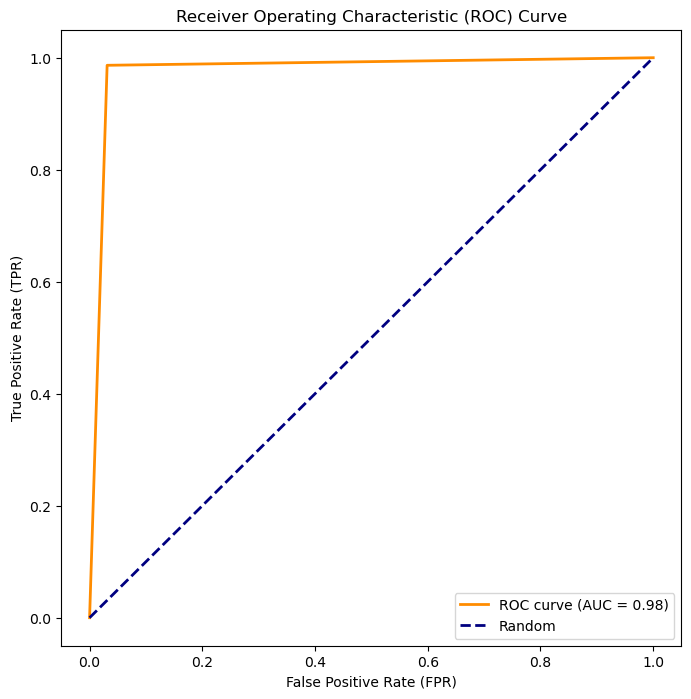

In [75]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gridLR)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [70]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_gridLR))
print("Classification Report:\n", classification_report(y_test, y_pred_gridLR))

Accuracy: 0.9739130434782609
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.93      0.99      0.96       296

    accuracy                           0.97      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.98      0.97      0.97      1035



In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [72]:
# Create an SVM classifier
svm_classifier = SVC()

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [76]:
# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

In [77]:
best_C

1

In [78]:
best_kernel

'linear'

In [79]:
# Create a new classifier with the best hyperparameters
best_svm_classifier = SVC(C=best_C, kernel=best_kernel)

In [80]:
# Train the model with the full training data
best_svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [81]:
# Make predictions on the test set
y_pred_gridSVM = best_svm_classifier.predict(X_test)

In [82]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_gridSVM))
print("Classification Report:\n", classification_report(y_test, y_pred_gridSVM))

Accuracy: 0.9671497584541063
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       739
           1       0.91      0.98      0.94       296

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035

